In [5]:
!date

Mon Aug 19 13:49:19 PDT 2024


In [6]:
!echo $CONDA_PREFIX

/c4/home/derek/miniconda3/envs/scquint_4


In [7]:
import pandas as pd
import numpy as np
import scanpy as sc
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
input_dir = "/c4/home/derek/data1/derek/data_scSLR/prenatal_brain/10X/GW21_1/STAR_Solo/Lane1/GeneFull/raw/"


In [9]:
adata_10X = sc.read_mtx(input_dir+'matrix.mtx').T

In [10]:
adata_10X.var_names = pd.read_csv(input_dir+'features.tsv',
            sep='\t',header=None)[1]

adata_10X.obs_names = pd.read_csv(input_dir+'barcodes.tsv',
            sep='\t',header=None)[0]

In [11]:
adata_10X

AnnData object with n_obs × n_vars = 6794880 × 36601

In [12]:
adata_SLR = sc.read_mtx('/c4/home/derek/data1/derek/data_scSLR/prenatal_brain/STAR_outs/GW21_1/StarOut/Solo.out/GeneFull/raw/matrix.mtx').T

adata_SLR.var_names = pd.read_csv('/c4/home/derek/data1/derek/data_scSLR/prenatal_brain/STAR_outs/GW21_1/StarOut/Solo.out/GeneFull/raw//features.tsv',
            sep='\t',header=None)[1]

adata_SLR.obs_names = pd.read_csv('/c4/home/derek/data1/derek/data_scSLR/prenatal_brain/STAR_outs/GW21_1/StarOut/Solo.out/GeneFull/raw/barcodes.tsv',
            sep='\t',header=None)[0]

In [13]:
adata_SLR = adata_SLR[adata_SLR.obs_names.isin(pd.read_csv('/c4/home/derek/data1/derek/data_scSLR/prenatal_brain/GW21_1_barcodes.csv',header=None)[0])]
adata_10X = adata_10X[adata_10X.obs_names.isin(pd.read_csv('/c4/home/derek/data1/derek/data_scSLR/prenatal_brain/GW21_1_barcodes.csv',header=None)[0])]

In [14]:
adata_10X.var_names_make_unique()
adata_SLR.var_names_make_unique()

/c4/home/derek/miniconda3/envs/scquint_4/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/c4/home/derek/miniconda3/envs/scquint_4/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [15]:
adata_SLR = adata_SLR[:,adata_SLR.var_names.isin(adata_10X.var_names)]
adata_10X = adata_10X[:,adata_10X.var_names.isin(adata_SLR.var_names)]

In [16]:
#adata_SLR= adata_SLR[adata_SLR.obs_names.isin(adata_10X.obs_names)]

In [17]:
sc.pp.calculate_qc_metrics(adata_10X,inplace=True)
sc.pp.calculate_qc_metrics(adata_SLR,inplace=True)

/c4/home/derek/miniconda3/envs/scquint_4/lib/python3.10/site-packages/scanpy/preprocessing/_qc.py:135: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics
/c4/home/derek/miniconda3/envs/scquint_4/lib/python3.10/site-packages/scanpy/preprocessing/_qc.py:135: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics


In [18]:
r_val = stats.pearsonr(x=adata_SLR.var.log1p_total_counts,
            y=adata_10X.var.log1p_total_counts,)[0].round(3)

In [19]:
values = np.vstack([adata_SLR.var.log1p_total_counts,
                    adata_10X.var.log1p_total_counts])
kernel = stats.gaussian_kde(values)(values)



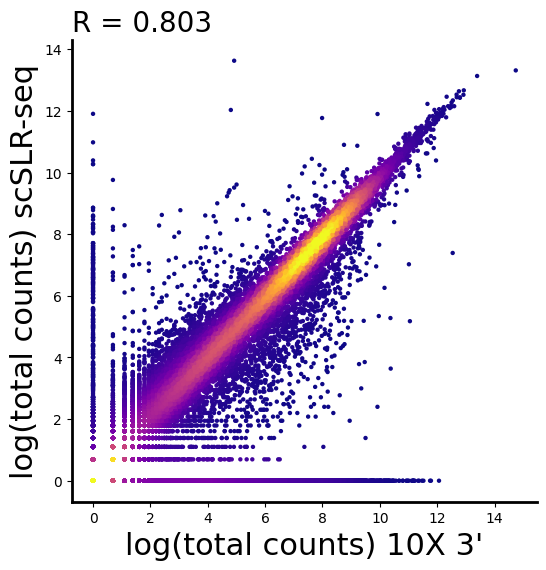

In [28]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(6, 6))

n = sns.scatterplot(x=values[1],
            y=values[0],
            s=10,
            linewidth=0,
            hue=kernel,
            palette='plasma',
            ax=ax,
            hue_norm = (0,0.075)
           )

ax.get_legend().remove()
# ax.figure.colorbar(n)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

ax.spines.bottom.set_linewidth(2)
ax.spines.left.set_linewidth(2)

ax.set_title(f'R = {r_val}',loc='left', fontsize=20)

ax.set_xlabel("log(total counts) 10X 3'", fontsize=22)
ax.set_ylabel('log(total counts) scSLR-seq', fontsize=22)

fig.savefig('./plots/10X_SLR_corr_prenatal.pdf')

# scSLR technical replicate correlation

In [29]:
adata_SLR_2 = sc.read_mtx('/c4/home/derek/data1/derek/data_scSLR/prenatal_brain/STAR_outs/GW21_2/StarOut/Solo.out/GeneFull/raw/matrix.mtx').T

adata_SLR_2.var_names = pd.read_csv('/c4/home/derek/data1/derek/data_scSLR/prenatal_brain/STAR_outs/GW21_2/StarOut/Solo.out/GeneFull/raw//features.tsv',
            sep='\t',header=None)[1]

adata_SLR_2.obs_names = pd.read_csv('/c4/home/derek/data1/derek/data_scSLR/prenatal_brain/STAR_outs/GW21_2/StarOut/Solo.out/GeneFull/raw/barcodes.tsv',
            sep='\t',header=None)[0]

In [30]:
adata_SLR_2 = adata_SLR_2[adata_SLR_2.obs_names.isin(pd.read_csv('/c4/home/derek/data1/derek/data_scSLR/prenatal_brain/GW21_2_barcodes.csv',header=None)[0])]



In [31]:
adata_SLR_2.var_names_make_unique()

/c4/home/derek/miniconda3/envs/scquint_4/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [32]:
sc.pp.calculate_qc_metrics(adata_SLR_2,inplace=True)

In [33]:
adata_SLR = adata_SLR[:,adata_SLR.var_names.isin(adata_SLR_2.var_names)]
adata_SLR_2 = adata_SLR_2[:,adata_SLR_2.var_names.isin(adata_SLR.var_names)]

In [34]:
r_val = stats.pearsonr(x=adata_SLR.var.log1p_total_counts,
            y=adata_SLR_2.var.log1p_total_counts,)[0].round(3)

In [35]:
r_val

0.995

In [36]:
values = np.vstack([adata_SLR.var.log1p_total_counts,
                    adata_SLR_2.var.log1p_total_counts])
kernel = stats.gaussian_kde(values)(values)

/scratch/derek/ipykernel_3153627/1943256863.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(i) for i in ax.get_yticks()], fontsize=16)
/scratch/derek/ipykernel_3153627/1943256863.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(i) for i in ax.get_xticks()], fontsize=16)


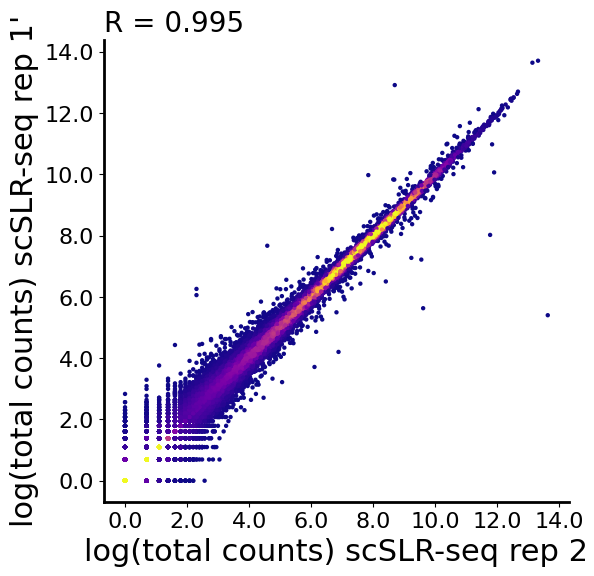

In [48]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(6, 6))

n = sns.scatterplot(x=values[0],
            y=values[1],
            s=10,
            linewidth=0,
            hue=kernel,
            palette='plasma',
            ax=ax,
            hue_norm = (0,0.3)
           )

ax.get_legend().remove()
# ax.figure.colorbar(n)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

ax.spines.bottom.set_linewidth(2)
ax.spines.left.set_linewidth(2)

ax.set_title(f'R = {r_val}',loc='left', fontsize=20)


ax.set_ylabel("log(total counts) scSLR-seq rep 1'", fontsize=22)
ax.set_xlabel('log(total counts) scSLR-seq rep 2', fontsize=22)

ax.set_yticklabels([str(i) for i in ax.get_yticks()], fontsize=16)
ax.set_xticklabels([str(i) for i in ax.get_xticks()], fontsize=16)


fig.savefig('./plots/SLR_rep_corr_prenatal.pdf')

In [54]:
!conda list

# packages in environment at /c4/home/derek/miniconda3/envs/SCVI:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main  
_openmp_mutex             5.1                       1_gnu  
absl-py                   1.4.0                    pypi_0    pypi
aiohttp                   3.8.3                    pypi_0    pypi
aiosignal                 1.3.1                    pypi_0    pypi
anndata                   0.8.0                    pypi_0    pypi
anyio                     3.5.0            py39h06a4308_0  
appdirs                   1.4.4                    pypi_0    pypi
argon2-cffi               20.1.0           py39h27cfd23_1  
asttokens                 2.2.1                    pypi_0    pypi
async-timeout             4.0.2                    pypi_0    pypi
attrs                     22.2.0                   pypi_0    pypi
babel                     2.11.0           py39h06a4308_0  
backcall                  0.2.0      